In [1]:
using QuantumOptics 
using PyPlot

In [2]:
g_coupling = [2*π*i for i in linspace(0,1,50)]  

50-element Array{Float64,1}:
 0.0     
 0.128228
 0.256457
 0.384685
 0.512913
 0.641141
 0.76937 
 0.897598
 1.02583 
 1.15405 
 1.28228 
 1.41051 
 1.53874 
 ⋮       
 4.87267 
 5.0009  
 5.12913 
 5.25736 
 5.38559 
 5.51382 
 5.64204 
 5.77027 
 5.8985  
 6.02673 
 6.15496 
 6.28319 

In [11]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
#g = [2*π*i for i in linspace(0,50,50)]    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States



########################


# Bases
# Definimos las bases en las que trabajaremos. Al final tomamos el producto tensorial para general la base general. 

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin


########################

# Fundamental operators

a = destroy(b_fock)   #La función destroy : Annihilation operator for the given Fock space 
at = create(b_fock)   #La función create: Creation operator for the given Fock space.
n = number(b_fock)    # number : Number operator for the given Fock space 



sm = sigmam(b_spin)   
sp = sigmap(b_spin)   
sz = sigmaz(b_spin)

Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]

#H = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling] 

#Tiempo
T = Array(linspace(0,100,1000));

In [12]:
Hint_coupling = [g*(at⊗sm + a⊗sp) for g in g_coupling]
H_coupling = [identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint for Hint in Hint_coupling] 

50-element Array{QuantumOptics.operators_sparse.SparseOperator,1}:
 QuantumOptics.operators_sparse.SparseOperator(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),
	[1 ,  1]  =  3.14159+0.0im
	[2 ,  2]  =  -3.14159+0.0im
	[3 ,  3]  =  9.42478+0.0im
	[4 ,  4]  =  3.14159+0.0im
	[5 ,  5]  =  15.708+0.0im
	[6 ,  6]  =  9.42478+0.0im
	[7 ,  7]  =  21.9911+0.0im
	[8 ,  8]  =  15.708+0.0im
	[9 ,  9]  =  28.2743+0.0im
	[10, 10]  =  21.9911+0.0im
	⋮
	[22, 22]  =  59.6903+0.0im
	[23, 23]  =  72.2566+0.0im
	[24, 24]  =  65.9734+0.0im
	[25, 25]  =  78.5398+0.0im
	[26, 26]  =  72.2566+0.0im
	[27, 27]  =  84.823+0.0im
	[28, 28]  =  78.5398+0.0im
	[29, 29]  =  91.1062+0.0im
	[30, 30]  =  84.823+0.0im
	[31, 31]  =  97.3894+0.0im
	[32, 32]  =  91.1062+0.0im

In [13]:
psi0 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))

QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335+0.0im,0.0+0.0im,0.270671+0.0im,0.0+0.0im,0.382786+0.0im,0.0+0.0im,0.442003+0.0im,0.0+0.0im,0.442003+0.0im,0.0+0.0im  …  0.0438695+0.0im,0.0+0.0im,0.0253281+0.0im,0.0+0.0im,0.0140495+0.0im,0.0+0.0im,0.00750977+0.0im,0.0+0.0im,0.00387803+0.0im,0.0+0.0im])

In [14]:
psi_coupling_evol =  [timeevolution.schroedinger(T,psi0,H) for H in H_coupling]

50-element Array{Tuple{Array{Float64,1},Array{QuantumOptics.states.Ket,1}},1}:
 ([0.0,0.1001,0.2002,0.3003,0.4004,0.500501,0.600601,0.700701,0.800801,0.900901  …  99.0991,99.1992,99.2993,99.3994,99.4995,99.5996,99.6997,99.7998,99.8999,100.0],QuantumOptics.states.Ket[QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335+0.0im,0.0+0.0im,0.270671+0.0im,0.0+0.0im,0.382786+0.0im,0.0+0.0im,0.442003+0.0im,0.0+0.0im,0.442003+0.0im,0.0+0.0im  …  0.0438695+0.0im,0.0+0.0im,0.0253281+0.0im,0.0+0.0im,0.0140495+0.0im,0.0+0.0im,0.00750977+0.0im,0.0+0.0im,0.00387803+0.0im,0.0+0.0im]),QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.128698-0.0418614im,0.0+0.0im,0.15889-0.219127im,0.0+0.0im,-0.000601881-0.382786im,0.0+

In [15]:

expecto = []
for i in 1:length(H_coupling)
    tout, psi_coupling_evol = timeevolution.schroedinger(T,psi0,H_coupling[i])
    push!(expecto, expect(identityoperator(b_fock) ⊗ sz, psi_coupling_evol))
end
return expecto

50-element Array{Any,1}:
 Complex{Float64}[0.999995+0.0im,0.999995+0.0im,0.999995+0.0im,0.999995+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im,0.999994+0.0im  …  0.999843+0.0im,0.999843+0.0im,0.999843+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im,0.999842+0.0im]                       
 Complex{Float64}[0.999995+0.0im,0.998348+0.0im,0.993413+0.0im,0.98521+0.0im,0.97377+0.0im,0.959135+0.0im,0.941363+0.0im,0.920521+0.0im,0.896688+0.0im,0.869955+0.0im  …  0.567584+0.0im,0.57025+0.0im,0.571365+0.0im,0.570918+0.0im,0.568901+0.0im,0.565313+0.0im,0.560155+0.0im,0.553435+0.0im,0.545164+0.0im,0.535357+0.0im]                          
 Complex{Float64}[0.999995+0.0im,0.993414+0.0im,0.97377+0.0im,0.941364+0.0im,0.896688+0.0im,0.840423+0.0im,0.773422+0.0im,0.696698+0.0im,0.611404+0.0im,0.51882+0.0im  …  0.353151+0.0im,0.330633+0.0im,0.304321+0.0im,0.274456+0.0im,0.241318+0.0im,0.205228+0.0im,0.166541+0.0im,0.125648

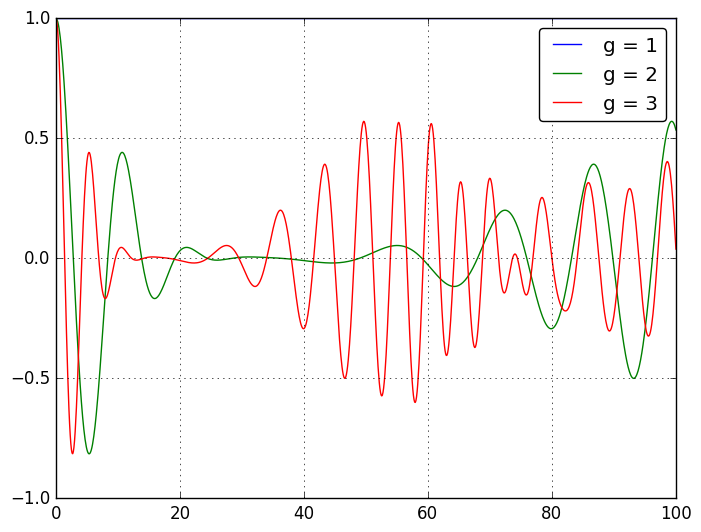

PyObject <matplotlib.legend.Legend object at 0x7fef26287080>

In [19]:
for i in 1:3
    plot(T,expecto[i], label = "g = $i")
end

grid("on")
legend(loc="upper right",fancybox="true")